In [36]:
!pip install requests
!pip install pandas
!pip install numpy
!pip install sqlalchemy==1.4.16
!pip install pymysql
!pip install scikit-learn
!pip install matplotlib
!pip list

  Using cached matplotlib-3.7.1-cp311-cp311-macosx_11_0_arm64.whl (7.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 3.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.6 MB/s eta 0:00:00
  Using cached Pillow-9.5.0-cp311-cp311-macosx_11_0_arm64.whl (3.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 2.0 MB/s eta 0:00:00a 0:00:01
Package                  Version
------------------------ ---------
anyio                    3.7.0
appnope                  0.1.3
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
arrow                    1.2.3
asttokens                2.2.1
attrs                    23.1.0
backcall                 0.2.0
beautifulsoup4           4.12.2
bleach                   6.0.0
certifi                  2023.5.7
cffi                     1.15.1
charset-normalizer       3.1.0
comm                     0.1

In [9]:
from tmdbapi import Movie, MovieDB

movie = Movie()
movie.make_movie_data_and_save_db(501,600)

get_popular_movie page: 501


KeyError: 'results'

In [1]:
movie = Movie()

movie.make_movie_data_and_save_db(101, 200)

NameError: name 'Movie' is not defined

In [ ]:
movie = Movie()

movie.make_movie_data_and_save_db(61, 90)

In [ ]:
movie = Movie()

movie.make_movie_data_and_save_db(91, 120)

In [ ]:
movie = Movie()

movie.make_movie_data_and_save_db(121, 150)

In [ ]:
movie = Movie()

movie.make_movie_data_and_save_db(151, 180)

In [ ]:
movie = Movie()

movie.make_movie_data_and_save_db(181, 210)

In [ ]:
movie = Movie()

movie.make_movie_data_and_save_db(211, 240)

In [ ]:
movie = Movie()

movie.make_movie_data_and_save_db(241, 270)

In [ ]:
movie = Movie()

movie.make_movie_data_and_save_db(271, 300)

In [ ]:
movie = Movie()

movie.make_movie_data_and_save_db(301, 330)

In [ ]:
movie = Movie()

movie.make_movie_data_and_save_db(331, 360)

In [ ]:
movie = Movie()

movie.make_movie_data_and_save_db(361, 390)

In [1]:
import pandas as pd
from tmdbapi import MovieDB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

db_util = MovieDB()

movie_df, actor_df = db_util.get_data_from_database()
movie_df = movie_df.dropna()

movie_df.tail()

db_util.close_connection()

In [15]:
actor_df['id'] = actor_df['id'].astype('str')
actor_df['popularity'] = actor_df['popularity'].astype('double')
joined_df = pd.merge(movie_df, actor_df.rename(columns={'popularity': 'popularity1'}), left_on='actor_id1', right_on='id', how='left', suffixes=('1','1'))
joined_df = pd.merge(joined_df, actor_df.rename(columns={'popularity': 'popularity2'}), left_on='actor_id2', right_on='id', how='left', suffixes=('2','2'))
joined_df = pd.merge(joined_df, actor_df.rename(columns={'popularity': 'popularity3'}), left_on='actor_id3', right_on='id', how='left', suffixes=('3','3'))

# feature_columns = ['Action', 'Crime', 'Thriller', 'Adventure', 'Animation', 'Comedy',
#                    'Family', 'Fantasy', 'Science Fiction', 'Horror', 'Romance',
#                    'Drama', 'Mystery', 'War', 'revenue', 'popularity1', 'popularity2',
#                    'popularity3']

feature_columns = ['Action', 'Crime', 'Thriller', 'Adventure', 'Comedy',
                   'Family', 'Fantasy', 'Science Fiction', 'Horror', 'Romance',
                   'Drama', 'Mystery', 'War','popularity1', 'popularity2', 'popularity3']

joined_df = joined_df.dropna()
joined_df = joined_df[joined_df['revenue'] > 100]
X = joined_df[feature_columns]
y = joined_df['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Test set으로 예측을 수행합니다.
y_pred = regressor.predict(X_test)

# 결과를 확인합니다.
print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)

print('Mean squared error:', mean_squared_error(y_test, y_pred))
# print(joined_df.shape[0])

print(y_pred)
print(y_test)

print(X)

Coefficients: [ 2.08556149e+07 -1.99546948e+07 -3.94829713e+07  1.23766005e+08
 -5.52506841e+07  6.78536776e+06  1.59534647e+07  8.77659471e+07
 -5.00472641e+06  3.73301925e+06 -4.00754076e+07 -7.62800751e+06
  4.94405208e+07  1.09354821e+05  1.04475421e+06  6.74719205e+06]
Intercept: -45530615.66867322
Mean squared error: 2.572127430070401e+16
[ 5.29842120e+08  1.05248154e+08  8.76048951e+07  7.15123127e+07
  4.37919907e+07  6.62051378e+07  2.72164163e+07  2.54550410e+08
  1.58420257e+08  1.55775559e+08  8.55989226e+06  2.68904909e+08
  2.62644698e+08  3.42159018e+08 -1.84387565e+07  2.52718637e+08
  1.38894329e+08  2.51745919e+07  4.54969377e+08  1.40282053e+08
  8.31523297e+07  4.46237600e+07  9.13529068e+07  1.16738703e+07
  1.78812153e+08  1.73347809e+08  8.03904777e+07  1.37041292e+08
  1.02225671e+08  1.49916885e+08  1.60024614e+08  7.54450712e+07
  1.39557559e+08  1.02735253e+08  1.55820707e+08  3.26312735e+07
  1.08340727e+08 -7.43976535e+06  1.02522912e+08  6.19242680e+07
  6

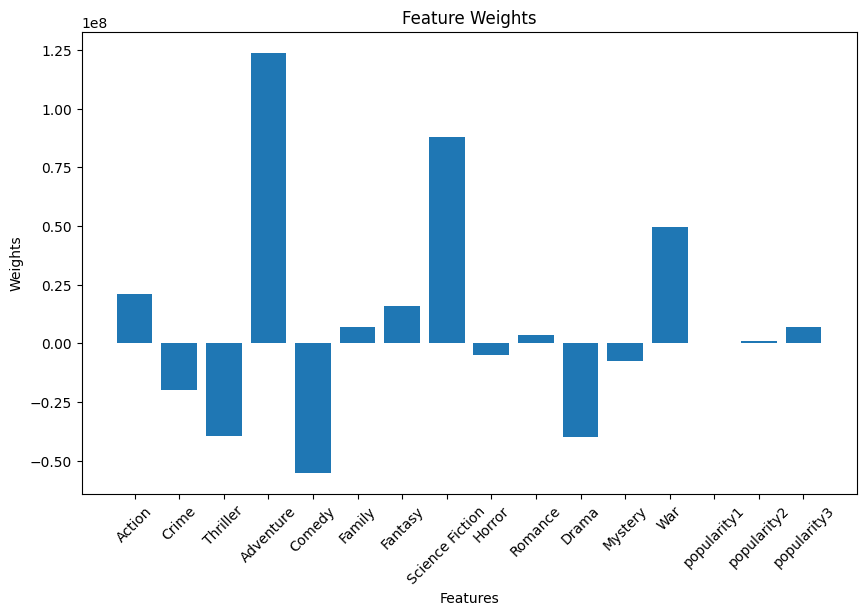

In [13]:
import matplotlib.pyplot as plt

# 각 feature의 가중치를 저장합니다.
feature_weights = regressor.coef_

# 각 feature의 이름을 저장합니다.
feature_names = X.columns

# 가중치를 시각화합니다.
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_weights)
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Feature Weights')
plt.xticks(rotation=45)
plt.show()

Coefficients: [ 2.84795758e+07 -2.27073446e+07 -5.33910725e+07  1.17136339e+08
 -3.72529030e-08 -7.03017678e+07  5.81648226e+06  2.85819646e+07
  1.15916693e+08 -7.33827936e+06  1.68027133e+07 -4.67472443e+07
 -1.93872776e+07  6.13954344e+07  6.38946057e+05  8.42840970e+05
  6.52358002e+06]
Intercept: -30900141.073306948
Mean squared error (Train set): 4.428484922182414e+16
Mean squared error (Test set): 4.196612522965776e+16


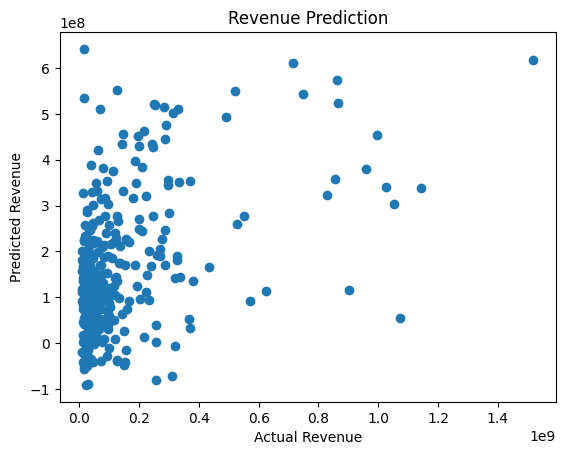

In [5]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# train set으로 예측을 수행합니다.
y_train_pred = regressor.predict(X_train)

# train set의 mean_squared_error 값을 계산합니다.
train_mse = mean_squared_error(y_train, y_train_pred)

# Test set으로 예측을 수행합니다.
y_pred = regressor.predict(X_test)

# 결과를 확인합니다.
print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)

print('Mean squared error (Train set):', train_mse)
print('Mean squared error (Test set):', mean_squared_error(y_test, y_pred))

# 데이터 분포 시각화
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Revenue Prediction')
plt.show()


In [10]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Random Forest
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
rf_y_pred = rf_regressor.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)

# Gradient Boosting
gb_regressor = GradientBoostingRegressor(random_state=22)
gb_regressor.fit(X_train, y_train)
gb_y_pred = gb_regressor.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)

print('Random Forest Mean squared error:', rf_mse)
print('Gradient Boosting Mean squared error:', gb_mse)

Random Forest Mean squared error: 3.650296809101349e+16
Gradient Boosting Mean squared error: 3.2336086546155344e+16
